# **Project Name**    -  Global Terrorism Data

##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**
The Global Terrorism Database (GTD) is a comprehensive open-source database that contains information on terrorist incidents worldwide from 1970 to 2017. Managed by the National Consortium for the Study of Terrorism and Responses to Terrorism (START) at the University of Maryland, the GTD is a critical resource for researchers, policymakers, and security agencies. It encompasses more than 180,000 incidents, offering detailed data on domestic and international terrorism events, including the location, perpetrators, weapons used, casualties, and more. The extensive temporal and geographic coverage of the dataset provides valuable insights into terrorism patterns, trends, and the evolving nature of terrorist activities over nearly five decades.

# **Problem Statement**
Terrorism poses a significant threat to global security, causing loss of life, economic disruption, and widespread fear. Despite numerous efforts to combat terrorism, it remains a persistent issue that requires continuous analysis and adaptation of counter-terrorism strategies. The Global Terrorism Database (GTD), which includes data on over 180,000 terrorist incidents from 1970 to 2017, provides a valuable resource for understanding terrorism trends, tactics, and impacts. However, effectively leveraging this data to derive actionable insights remains a challenge. The complexity and volume of the dataset necessitate a structured approach to analyze and interpret the information, enabling stakeholders to make informed decisions to enhance security measures.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset Loading

In [ ]:
# loading the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# give the path of the dataset
path = '/content/drive/MyDrive/Global Terrorism Data.csv'


In [ ]:
# to ignore errors if any
with open(path, 'r', encoding='utf-8', errors='ignore') as file:
  data = file.read()

In [ ]:
try:
  data = pd.read_csv(path, encoding='utf-8')
except UnicodeDecodeError:
# If a UnicodeDecodeError occurs, try reading with a different encoding
  print("UTF-8 decoding error, trying with 'latin-1' encoding.")
  data = pd.read_csv(path, encoding='latin-1')


UTF-8 decoding error, trying with 'latin-1' encoding.


<ipython-input-6-e326326b596f>:6: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, encoding='latin-1')


### Dataset First View

In [ ]:
# dataset first view
data

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.shape     # the dataset has 181691 rows and 135 columns

(181691, 135)

### Dataset Information

In [ ]:
# Dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
# Column datatypes
data.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

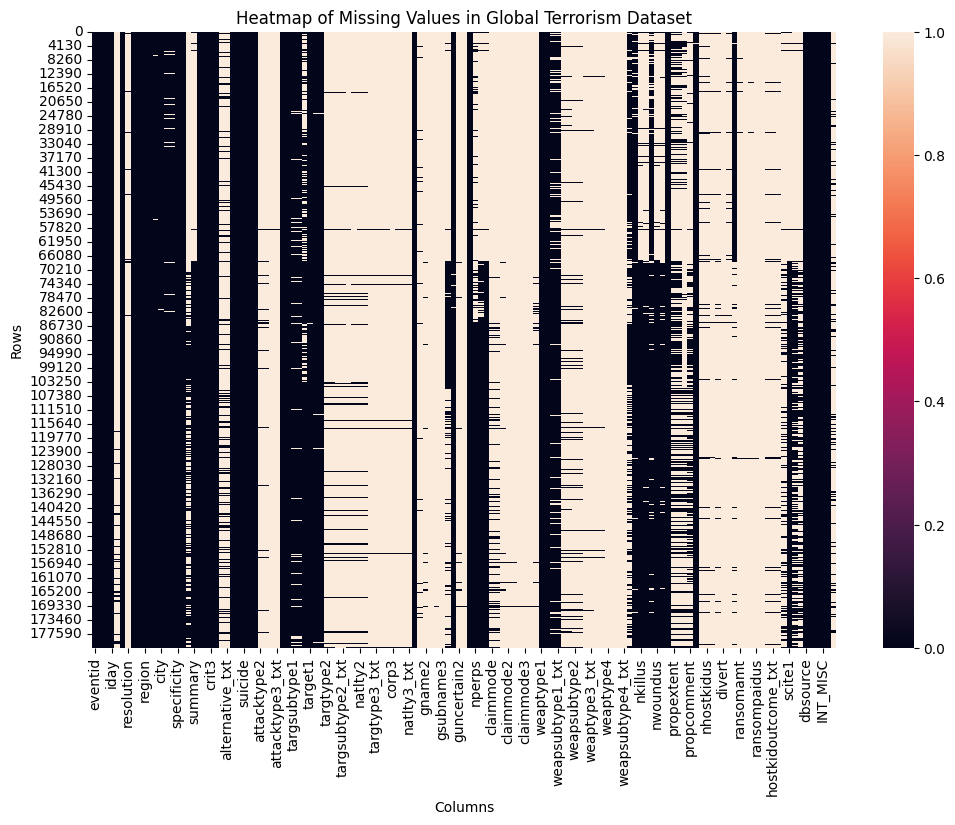

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull())
plt.title('Heatmap of Missing Values in Global Terrorism Dataset')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

## What did you know about your dataset?

* Number of Columns: The dataset contains 135 columns.
* Number of Rows: The dataset contains over 180,000 rows.
* Column Types: The columns include a mix of integers, floats, and objects (strings).
* eventid: Unique identifier for each incident.
* iyear, imonth, iday: Date components of the incident.
* country, region, city: Location details of the incident.
* attacktype1_txt, weaptype1_txt: Description of the attack type and weapon type.
* nkill, nwound: Number of people killed and wounded.
* gname: Name of the perpetrator group.
* targtype1_txt: Type of target.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
# Dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
# Dataset Describe
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
data.nunique()

eventid       181691
iyear             47
imonth            13
iday              32
approxdate      2244
               ...  
INT_LOG            3
INT_IDEO           3
INT_MISC           3
INT_ANY            3
related        14306
Length: 135, dtype: int64

In [ ]:
# To view all the columns
pd.set_option("display.max_columns", None)

## 3. ***Data Wrangling***

In [ ]:
# To view the top 5 rows of data
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [ ]:
# To view last 5 rows of data
data.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,182.0,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Al-Shabaab,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,1.0,10.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,5.0,Unknown Gun Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,167.0,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Muslim extremists,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,4.0,Unknown,-99.0,Seven military planes were damaged in this att...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,160.0,Philippines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bangsamoro Islamic Freedom Movement (BIFM),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0

In [ ]:
# To filter the data, we can drop unwanted columns or filter the wanted columns from the data
# Count of unwanted columns is high, so we are filtering the columns we need.

columns_to_keep = ['eventid','iyear', 'imonth', 'iday', 'country_txt', 'region_txt','provstate','city', 'attacktype1_txt',
                   'targtype1_txt', 'target1', 'natlty1_txt', 'gname', 'weaptype1_txt', 'nkill', 'nwound']


In [ ]:
# Making a copy of data with these filtered columns
filtered_data = data[columns_to_keep].copy()
filtered_data

,eventid,iyear,imonth,iday,country_txt,region_txt,provstate,city,attacktype1_txt,targtype1_txt,target1,natlty1_txt,gname,weaptype1_txt,nkill,nwound
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Julio Guzman,Dominican Republic,MANO-D,Unknown,1.0,0.0
1,197000000002,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",Belgium,23rd of September Communist League,Unknown,0.0,0.0
2,197001000001,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Employee,United States,Unknown,Unknown,1.0,0.0
3,197001000002,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,United States,Unknown,Explosives,NaN,NaN
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,United States,Unknown,Incendiary,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,Armed Assault,Military,Checkpoint,Somalia,Al-Shabaab,Firearms,1.0,2.0
181687,201712310029,2017,12,31,Syria,Middle East & North Africa,Lattakia,Jableh,Bombing/Explosion,Military,Hmeymim Air Base,Russia,Muslim extremists,Explosives,2.0,7.0
181688,201712310030,2017,12,31,Philippines,Southeast Asia,Maguindanao,Kubentog,Facility/Infrastructure Attack,Private Citizens & Property,Houses,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary,0.0,0.0
181689,201712310031,2017,12,31,India,South Asia,Manipur,Imphal,Bombing/Explosion,Government (General),Office,India,Unknown,Explosives,0.0,0.0


In [ ]:
# To view columns in data
filtered_data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'country_txt', 'region_txt',
       'provstate', 'city', 'attacktype1_txt', 'targtype1_txt', 'target1',
       'natlty1_txt', 'gname', 'weaptype1_txt', 'nkill', 'nwound'],
      dtype='object')

In [ ]:
# To view the data types
filtered_data.dtypes

eventid              int64
iyear                int64
imonth               int64
iday                 int64
country_txt         object
region_txt          object
provstate           object
city                object
attacktype1_txt     object
targtype1_txt       object
target1             object
natlty1_txt         object
gname               object
weaptype1_txt       object
nkill              float64
nwound             float64
dtype: object

In [ ]:
# Dataset info
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   eventid          181691 non-null  int64  
 1   iyear            181691 non-null  int64  
 2   imonth           181691 non-null  int64  
 3   iday             181691 non-null  int64  
 4   country_txt      181691 non-null  object 
 5   region_txt       181691 non-null  object 
 6   provstate        181270 non-null  object 
 7   city             181256 non-null  object 
 8   attacktype1_txt  181691 non-null  object 
 9   targtype1_txt    181691 non-null  object 
 10  target1          181053 non-null  object 
 11  natlty1_txt      180132 non-null  object 
 12  gname            181691 non-null  object 
 13  weaptype1_txt    181691 non-null  object 
 14  nkill            171378 non-null  float64
 15  nwound           165380 non-null  float64
dtypes: float64(2), int64(4), object(10)
me

In [ ]:
# To describe the statistical report of the numerical data
filtered_data.describe()

,eventid,iyear,imonth,iday,nkill,nwound
count,1.816910e+05,181691.000000,181691.000000,181691.000000,171378.000000,165380.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,2.403272,3.167668
std,1.325957e+09,13.259430,3.388303,8.814045,11.545741,35.949392
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,2.000000,2.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1570.000000,8191.000000


In [ ]:
# To describe the statistical report of the categorical data
filtered_data.describe(include='object')

,country,region,provstate,city,attack_type,target_type,target,nationality,perpetrator_type,weap_type
count,181691,181691,181270,181256,181691,181691,181053,180132,181691,181691
unique,205,12,2855,36673,9,22,86005,215,3537,12
top,Iraq,Middle East & North Africa,Baghdad,Unknown,Bombing/Explosion,Private Citizens & Property,Civilians,Iraq,Unknown,Explosives
freq,24636,50474,7645,9775,88255,43511,6461,24113,82782,92426


In [ ]:
# To view the numerical columns data
numerical_columns = filtered_data.select_dtypes(include=['int64','float64'])
numerical_columns

,eventid,year,month,day,no_of_kills,no_of_wounds
0,197000000001,1970,7,2,1.0,0.0
1,197000000002,1970,0,0,0.0,0.0
2,197001000001,1970,1,0,1.0,0.0
3,197001000002,1970,1,0,NaN,NaN
4,197001000003,1970,1,0,NaN,NaN
...,...,...,...,...,...,...
181686,201712310022,2017,12,31,1.0,2.0
181687,201712310029,2017,12,31,2.0,7.0
181688,201712310030,2017,12,31,0.0,0.0
181689,201712310031,2017,12,31,0.0,0.0


In [ ]:
# To view the categorical columns data
categorical_columns = filtered_data.select_dtypes(include=['object'])
categorical_columns

,country,region,provstate,city,attack_type,target_type,target,nationality,perpetrator_type,weap_type
0,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Julio Guzman,Dominican Republic,MANO-D,Unknown
1,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",Belgium,23rd of September Communist League,Unknown
2,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Employee,United States,Unknown,Unknown
3,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,United States,Unknown,Explosives
4,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,United States,Unknown,Incendiary
...,...,...,...,...,...,...,...,...,...,...
181686,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,Armed Assault,Military,Checkpoint,Somalia,Al-Shabaab,Firearms
181687,Syria,Middle East & North Africa,Lattakia,Jableh,Bombing/Explosion,Military,Hmeymim Air Base,Russia,Muslim extremists,Explosives
181688,Philippines,Southeast Asia,Maguindanao,Kubentog,Facility/Infrastructure Attack,Private Citizens & Property,Houses,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary
181689,India,South Asia,Manipur,Imphal,Bombing/Explosion,Government (General),Office,India,Unknown,Explosives


In [ ]:
# Missing values/Null values count
filtered_data.isnull().sum()

eventid                0
iyear                  0
imonth                 0
iday                   0
country_txt            0
region_txt             0
provstate            421
city                 435
attacktype1_txt        0
targtype1_txt          0
target1              638
natlty1_txt         1559
gname                  0
weaptype1_txt          0
nkill              10313
nwound             16311
dtype: int64

In [ ]:
# Renaming the few columns
filtered_data.rename({'iyear':'year',
                      'imonth':'month',
                      'iday':'day',
                      'country_txt':'country',
                      'region_txt':'region',
                      'attacktype1_txt':'attack_type',
                      'targtype1_txt':'target_type',
                      'gname':'perpetrator_type',
                      'weaptype1_txt':'weap_type',
                      'nkill':'no_of_kills',
                      'nwound':'no_of_wounds'},axis=1,inplace=True)

In [ ]:
# renaming some other columns
filtered_data.rename({'target1':'target','natlty1_txt':'nationality'},axis=1,inplace=True)

In [ ]:
# To view the columns in data
filtered_data.columns

Index(['eventid', 'year', 'month', 'day', 'country', 'region', 'provstate',
       'city', 'attack_type', 'target_type', 'target', 'nationality',
       'perpetrator_type', 'weap_type', 'no_of_kills', 'no_of_wounds'],
      dtype='object')

In [ ]:
# To view top 2 rows of data
filtered_data.head(2)

,eventid,year,month,day,country,region,provstate,city,attack_type,target_type,target,nationality,perpetrator_type,weap_type,no_of_kills,no_of_wounds
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Julio Guzman,Dominican Republic,MANO-D,Unknown,1.0,0.0
1,197000000002,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",Belgium,23rd of September Communist League,Unknown,0.0,0.0


In [ ]:
# To view last 2 rows of data
filtered_data.tail(2)

,eventid,year,month,day,country,region,provstate,city,attack_type,target_type,target,nationality,perpetrator_type,weap_type,no_of_kills,no_of_wounds
181689,201712310031,2017,12,31,India,South Asia,Manipur,Imphal,Bombing/Explosion,Government (General),Office,India,Unknown,Explosives,0.0,0.0
181690,201712310032,2017,12,31,Philippines,Southeast Asia,Maguindanao,Cotabato City,Bombing/Explosion,Unknown,Unknown,Philippines,Unknown,Explosives,0.0,0.0


### What all manipulations have you done and insights you found?
* Loaded the dataset and explored the initial few rows to understand its structure and contents.
* Retained only relevant columns necessary for the analysis.
* Renamed columns for some of the columns for better understanding and meaningful.
* Got to known about dataset information like shape,data types,info,null values in a column, dataset information.
* Described the statistical report of the numerical data and categorical data.
* Viewed the numerical columns data and categorical columns data.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# 1.Line chart



## Terrorist Attacks over time

In [ ]:
# Aggregate the number of attacks per year
attacks_per_year = filtered_data['year'].value_counts().sort_index()
attacks_per_year.nlargest(10)  # gives top 10 years of attacks happened

year
2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
Name: count, dtype: int64

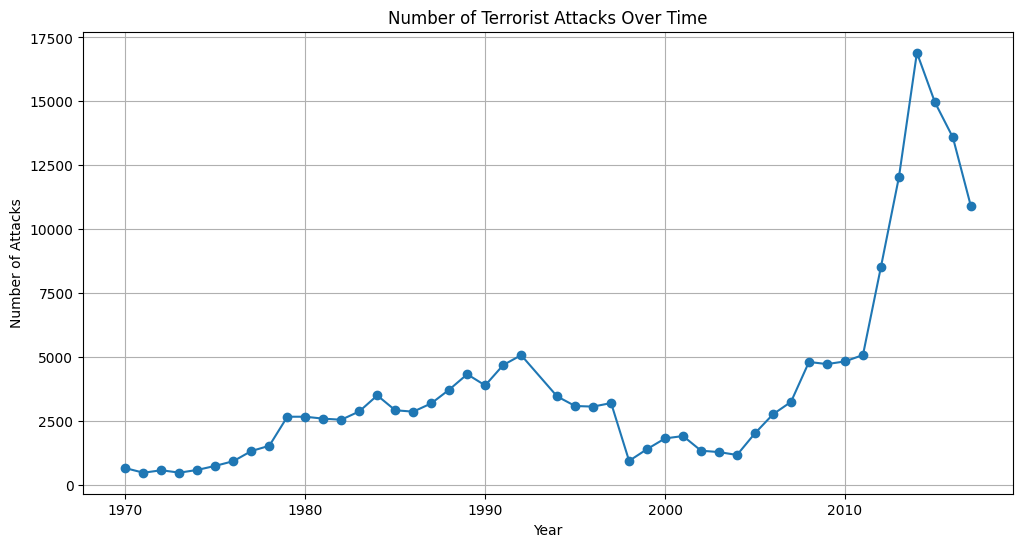

In [ ]:
# Aggregate the number of attacks per year
attacks_per_year = filtered_data['year'].value_counts().sort_index()

# Set the figure size
plt.figure(figsize=(12, 6))

# Line plot for number of attacks over time
plt.plot(attacks_per_year.index, attacks_per_year.values, marker='o', linestyle='-')

# Set the title
plt.title('Number of Terrorist Attacks Over Time')
# Set the x-axis label
plt.xlabel('Year')
# Set the y-axis label
plt.ylabel('Number of Attacks')
# Display the grid
plt.grid(True)
# Display the graph
plt.show()

#### Why did you pick the specific chart?
To visualize the trend of terrorist attacks over time.

#### Insights:
* The line chart reveals trends and fluctuations in the frequency of terrorist attacks over the years.
* From the year 2010 the number of attacks trend increased.

# 2.Count plot

## Most common attack types used by terrorists

In [ ]:
# Find the count of attack types
attack_type_counts = filtered_data['attack_type'].value_counts()
attack_type_counts

attack_type
Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: count, dtype: int64

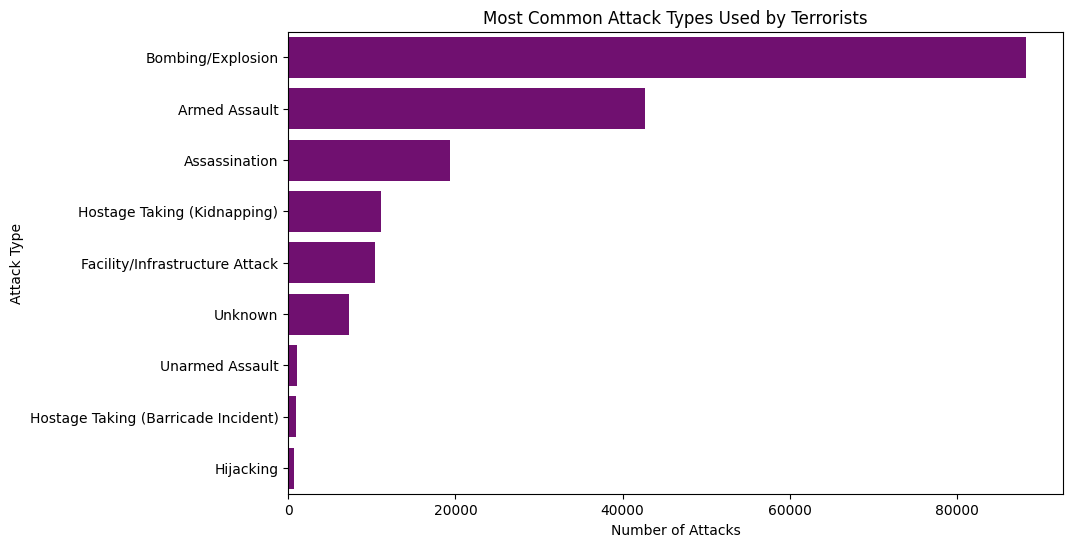

In [ ]:
# Set the figure size
plt.figure(figsize=(10,6))
# Plot the count plot chart
sns.countplot(data=filtered_data,y='attack_type', order=filtered_data['attack_type'].value_counts().index, color='purple')
# Set the title
plt.title('Most Common Attack Types Used by Terrorists')
# Set the x-axis label
plt.xlabel('Number of Attacks')
# Set the y-axis label
plt.ylabel('Attack Type')
# Display the graph
plt.show()

#### Why did you pick the specific chart?
To display the categorical data and to compare the number of attacks for each attack type and to identify the most common attack type.

#### Insights:
* Bombing/Explosion is the most common attack type used by the terrorists.

In [ ]:
#plt.figure(figsize=(24,7))

#sns.countplot(x='year',data=filtered_data,color='cyan')
#plt.title('Number of Terrorist attacks by year')
#plt.xlabel('Year')
#plt.ylabel('Number of terrorist attacks')
#plt.xticks(rotation=90)
#plt.show()

# 3.Pie chart

## Proportion of Terrorist Attacks by Region

In [ ]:
# Find the count of attacks w.r.t region
attacks_by_region = filtered_data['region'].value_counts()
attacks_by_region

region
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: count, dtype: int64

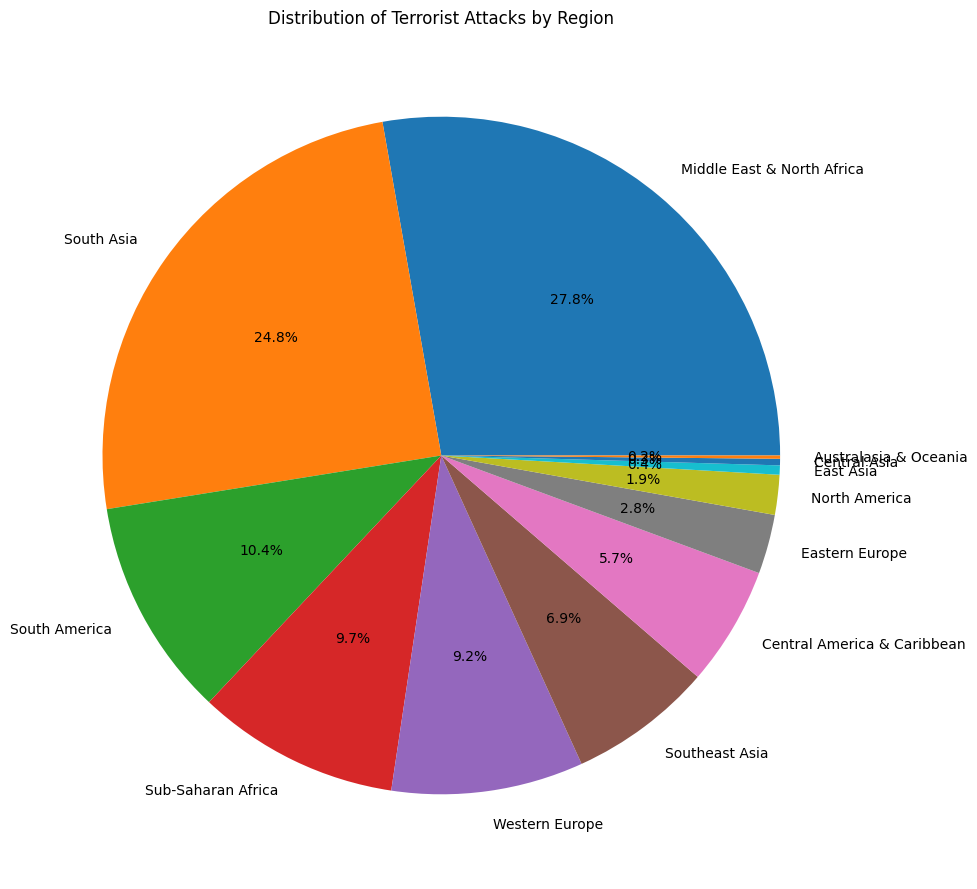

In [ ]:
# Set the figure size
plt.figure(figsize=(16,11))
# Plot the pie chart
plt.pie(attacks_by_region,labels=attacks_by_region.index,autopct='%1.1f%%')
# Set the title
plt.title('Distribution of Terrorist Attacks by Region')
# Display the graph
plt.show()

#### Why did you pick the specific chart?
To understand the regional distribution of terrorist attacks.

#### Insights:
* The region Middle East & North Africa has the highest distribution percentage of the terrorist attacks with 27.8%.
* Next followed by South Asia with 24.8%.

# 4.Box plot

## Distribution of Kills by Attack Type

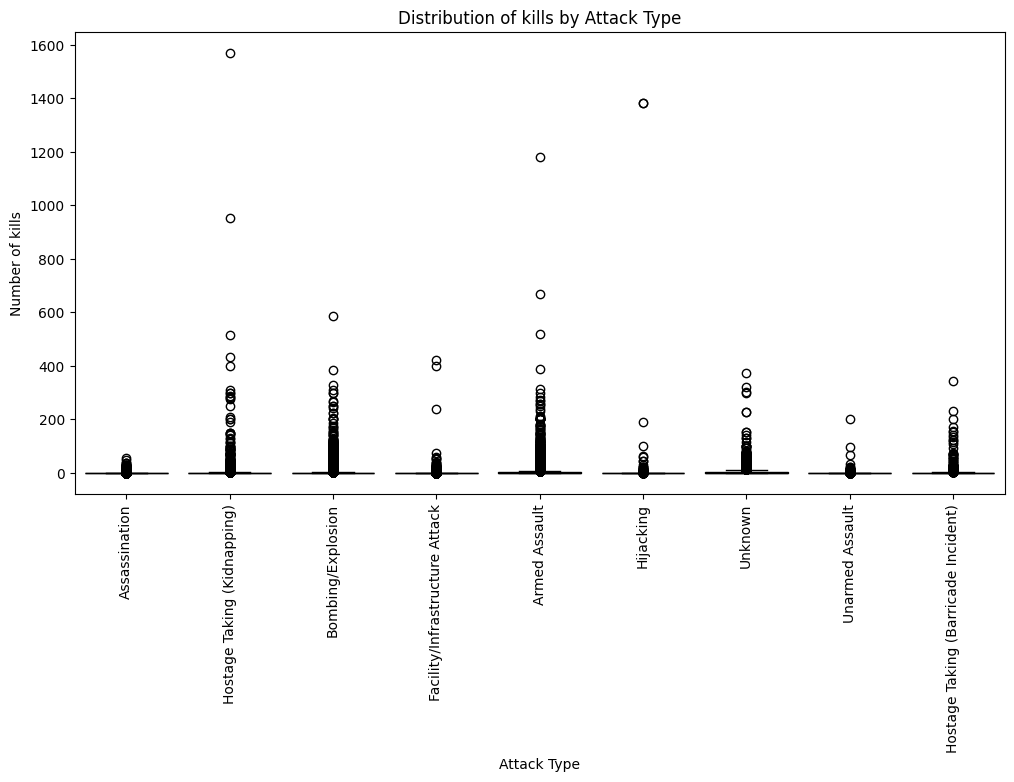

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Box plot for number of wounds by attack type
sns.boxplot( x='attack_type',y='no_of_kills', data=filtered_data,patch_artist=True, color='black')
#sns.boxplot(data=filtered_data, x='no_of_kills', patch_artist=True, color='black')
# Set the x axis angle rotation
plt.xticks(rotation=90)
# Set the title
plt.title('Distribution of kills by Attack Type')
# Set the x-axis label
plt.xlabel('Attack Type')
# Set the y-axis label
plt.ylabel('Number of kills')
# Display the graph
plt.show()

#### Why did you pick the specific chart?
To compare the severity in terms of kills of different attack types

#### Insights:
* The box plot provides a summary of the number of kills for each attack type.

## Box plot - Distribution of kills

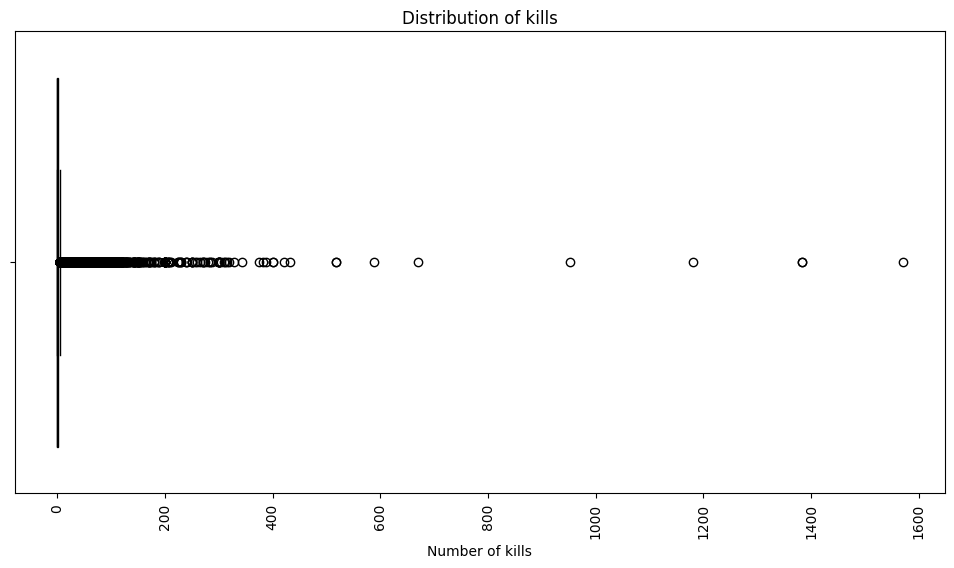

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Box plot for number of wounds by attack type
#sns.boxplot( x='attack_type',y='no_of_kills', data=filtered_data,patch_artist=True, color='black')
sns.boxplot(data=filtered_data, x='no_of_kills', patch_artist=True, color='black')
# Set the x axis angle rotation
plt.xticks(rotation=90)
# Set the title
plt.title('Distribution of kills')
# Set the x-axis label
#plt.xlabel('Attack Type')
# Set the y-axis label
plt.xlabel('Number of kills')
# Display the graph
plt.show()

#### Insights:
* The box plot provides a summary of the number of kills(single numerical column).

# 5.Bar plot

## Different Target types in Terrorist Incidents

In [ ]:
# Count the frequency of different target types
target_counts = filtered_data['target_type'].value_counts()
target_counts

target_type
Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: count, dtype: int64

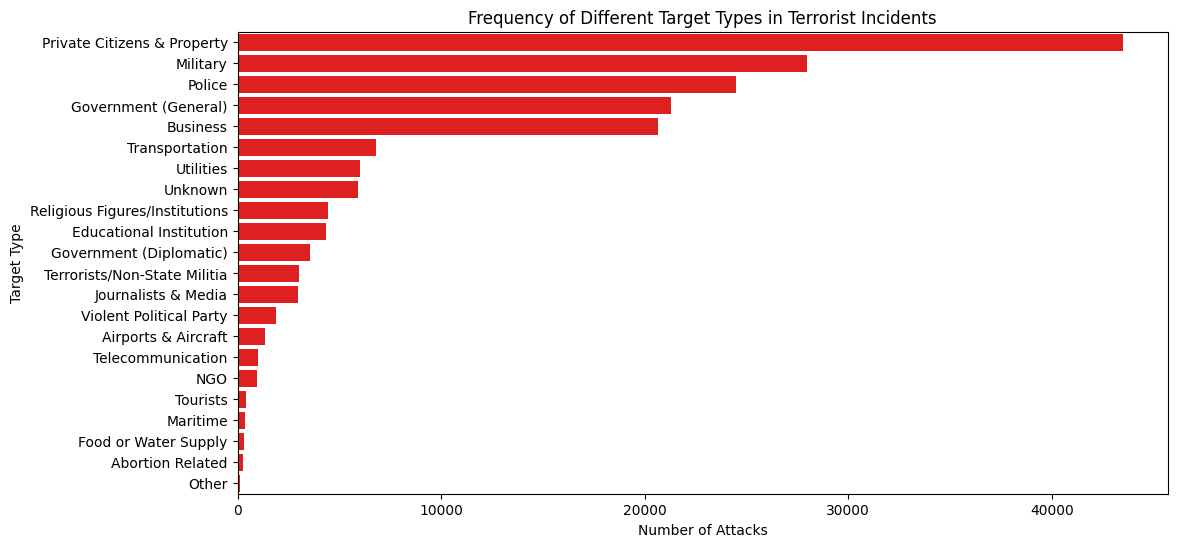

In [ ]:
# Count the frequency of different target types
target_counts = filtered_data['target_type'].value_counts()
# Set the figure size
plt.figure(figsize=(12, 6))
# Plot the bar chart
sns.barplot(x=target_counts.values, y=target_counts.index,color='red')#palette='viridis'
# Set the title
plt.title('Frequency of Different Target Types in Terrorist Incidents')
# Set the x-axis label
plt.xlabel('Number of Attacks')
# Set the y-axis label
plt.ylabel('Target Type')
# Display the graph
plt.show()


#### Why did you pick the specific chart?
To compare the different distributions and to present categorical data visually.

#### Insights:
* Private Citizens & Property are the one's most affected by the terrorist incidents.
* Followed by this, Military and Police one's are also most affected.

In [ ]:
filtered_data.head(1)

,eventid,year,month,day,country,region,provstate,city,attack_type,target_type,target,nationality,perpetrator_type,weap_type,no_of_kills,no_of_wounds
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Julio Guzman,Dominican Republic,MANO-D,Unknown,1.0,0.0


# 6.Scatter plot

## Number of Kills vs Number of Wounds by Attack Type

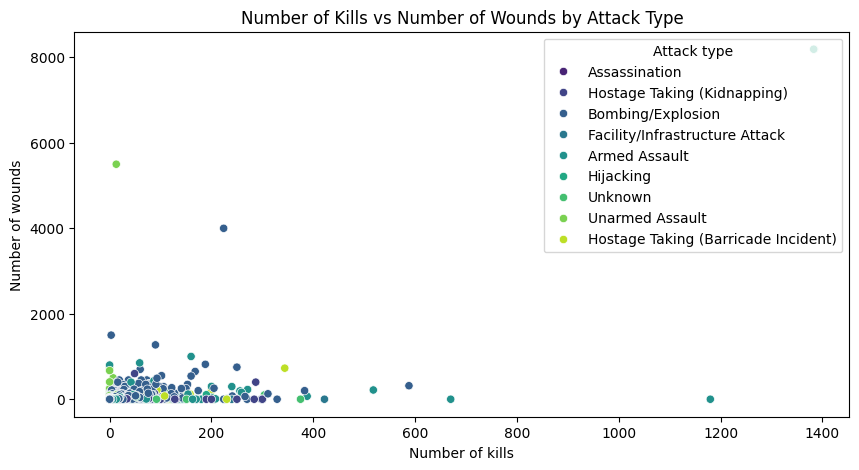

In [ ]:
# Set the figure size
plt.figure(figsize=(10,5))
# Plot the scatter plot for no_of_kills vs no_of_wounds by attack type
sns.scatterplot(data=filtered_data,x='no_of_kills',y='no_of_wounds',hue='attack_type',palette='viridis')
# Set the title
plt.title('Number of Kills vs Number of Wounds by Attack Type')
# Set the x axis label
plt.xlabel('Number of kills')
# Set the y axis label
plt.ylabel('Number of wounds')
# Set the legend
plt.legend(title='Attack type',loc='upper right')
# Display the graph
plt.show()

#### Why did you pick the specific chart?
To analyse the relationship between the number of kills and the number of wounds caused by terrorist attacks, and how it varies with attack types.

#### Insights:
* Helps to identify positive correlation between no of kills and no of wounds.
* Bombing/Explosion and Assasination are the most attck types caused by the terrorists.

# 7.Bar plot

## Average number of kills per region

In [ ]:
# Find the average number of kills per region
region_kills = filtered_data.groupby('region')['no_of_kills'].mean().reset_index()
region_kills

,region,no_of_kills
0,Australasia & Oceania,0.543478
1,Central America & Caribbean,3.578659
2,Central Asia,1.788909
3,East Asia,1.509830
4,Eastern Europe,1.489554
5,Middle East & North Africa,2.855584
6,North America,1.461790
7,South America,1.666994
8,South Asia,2.300770
9,Southeast Asia,1.280776


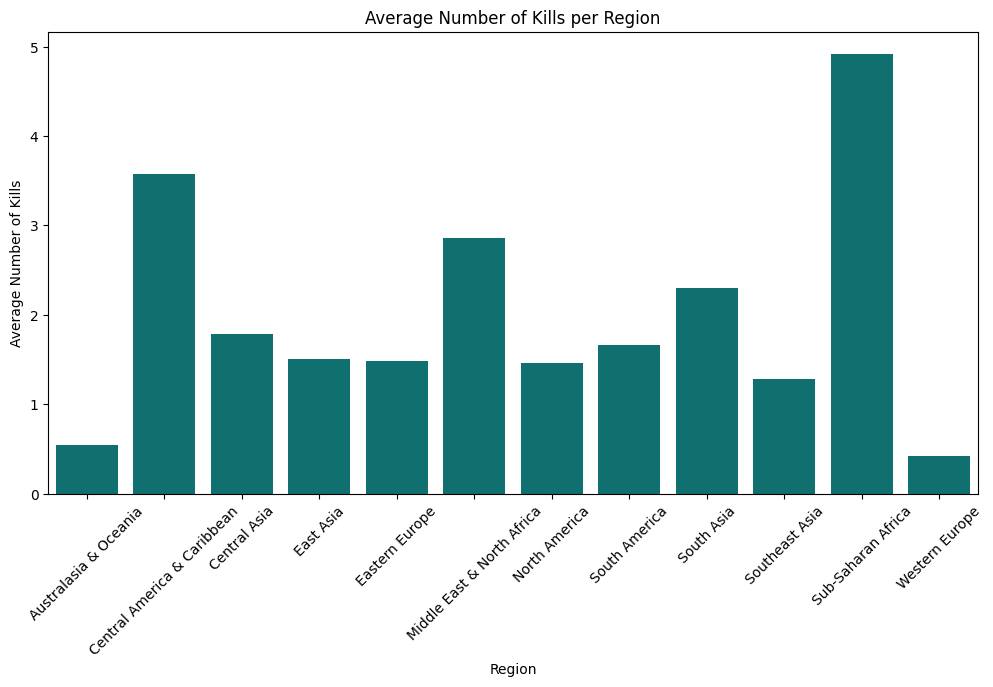

In [ ]:


# Plot the figure size
plt.figure(figsize=(12,6))
# Plot the bar plot for average number of kills per region
sns.barplot(data=region_kills,x='region',y='no_of_kills',color='teal')
# Set the title
plt.title('Average Number of Kills per Region')
# Set the x axis label
plt.xlabel('Region')
# Set the y axis label
plt.ylabel('Average Number of Kills')
# Set the x axis angle for region values
plt.xticks(rotation=45)
# Display the graph
plt.show()

#### Why did you pick the specific chart?
To compare the average number of kills across different regions.

### Insights:
* Sub-Saharan Africa has the highest average number of kills per region.
* Western Europe has the lowest average number of kills per region.

# 8.Heat map

## Correlation between number of kills and number of wounds

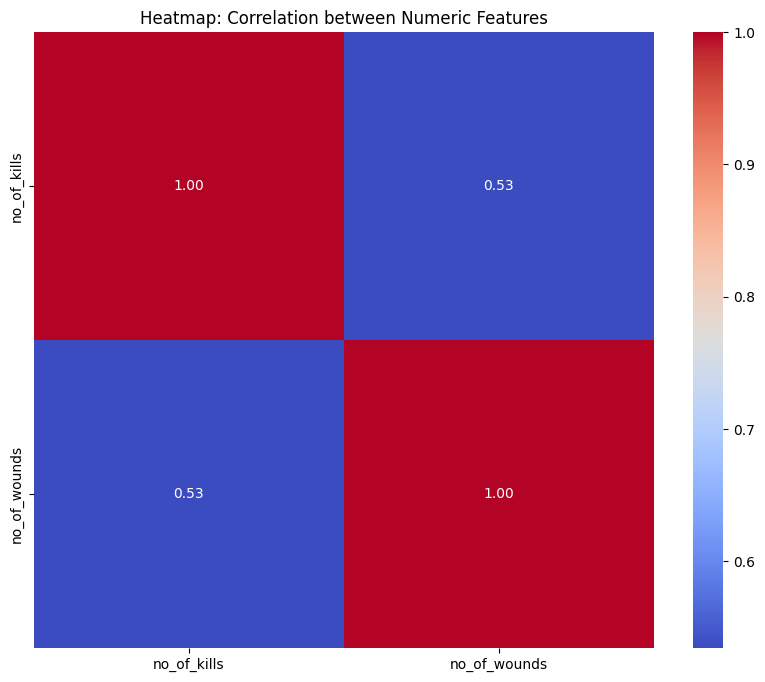

In [ ]:
# Heatmap - Correlation Matrix
# Plot the figure size
plt.figure(figsize=(10, 8))
# to find the correlation value
correlation_matrix = filtered_data[['no_of_kills', 'no_of_wounds']].corr()
# Plot the heap correlation between numeric features
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')       # annot=True to view correlation numbers
# Set the title
plt.title('Heatmap: Correlation between Numeric Features')
# Display the graph
plt.show()


#### Why did you pick the specific chart?
To visualize the correlation between numeric features like the number of kills and wounds.

### Insights:
* We get to know the correlation between the number of kills and number of wounds is 0.53. We can say this is a positive correlation number.

# 9.Bar plot

## Most active terrorist groups

In [ ]:
# Find the count of active terrorist groups
active_groups = filtered_data['perpetrator_type'].value_counts().head(15)
active_groups

perpetrator_type
Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Kurdistan Workers' Party (PKK)                       2310
Basque Fatherland and Freedom (ETA)                  2024
Communist Party of India - Maoist (CPI-Maoist)       1878
Maoists                                              1630
Liberation Tigers of Tamil Eelam (LTTE)              1606
Name: count, dtype: int64

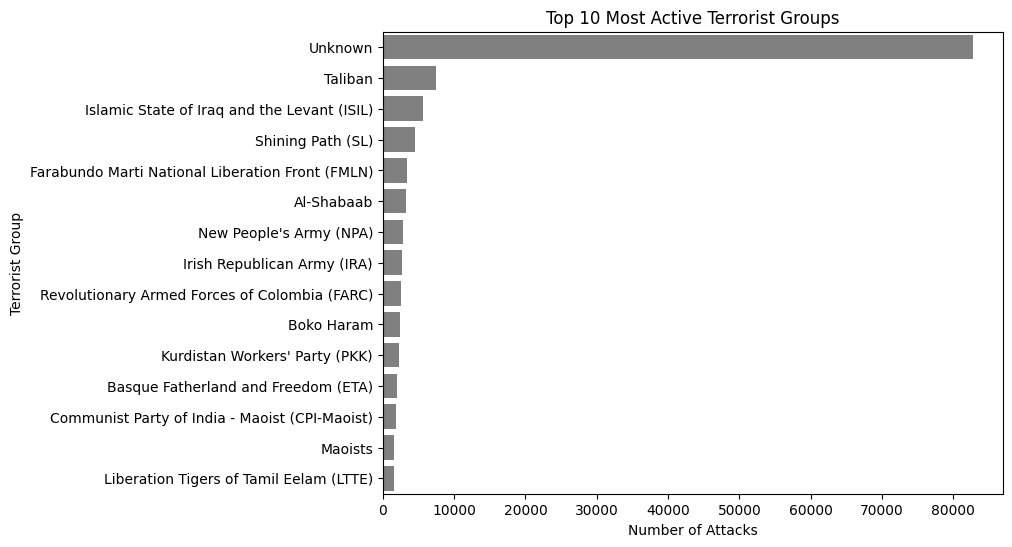

In [ ]:

# Plot the figure size
plt.figure(figsize=(8,6))
# Plot the bar chart
sns.barplot(x=active_groups.values, y=active_groups.index, color='gray')
# Set the x axis label
plt.xlabel('Number of Attacks')
# Set the y axis label
plt.ylabel('Terrorist Group')
# Set the title
plt.title('Top 10 Most Active Terrorist Groups')
# Display the graph
plt.show()

#### Why did you pick the specific chart?
To compare about the most active terrorist groups with the number of attacks.

#### Insights:
* Unknown terrorist groups are the most active terrorist group.

# 10.Bar chart

## Active terrorist groups in the last decade (2008-2017)

In [ ]:
# Filter data for the last decade (2008-2017)
last_decade = filtered_data[filtered_data['year']>=2008]

In [ ]:
# Calculate the most active terrorist groups in the last decade
active_groups_last_decade = last_decade['perpetrator_type'].value_counts().head(10)
active_groups_last_decade

perpetrator_type
Unknown                                           50314
Taliban                                            6866
Islamic State of Iraq and the Levant (ISIL)        5613
Al-Shabaab                                         3282
Boko Haram                                         2418
Communist Party of India - Maoist (CPI-Maoist)     1848
New People's Army (NPA)                            1684
Maoists                                            1384
Tehrik-i-Taliban Pakistan (TTP)                    1349
Kurdistan Workers' Party (PKK)                     1160
Name: count, dtype: int64

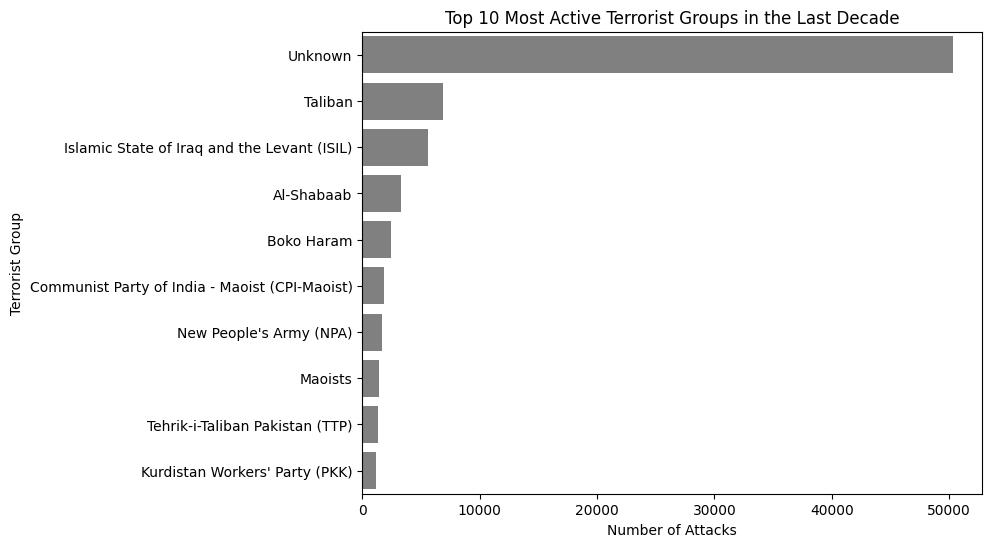

In [ ]:
# Plot the bar chart
# Plot the figure size
plt.figure(figsize=(8,6))
# Plot the bar chart to find active groups in last decade
sns.barplot(x=active_groups_last_decade.values, y=active_groups_last_decade.index,color='gray')
# Set the x axis label
plt.xlabel('Number of Attacks')
# Set the y axis label
plt.ylabel('Terrorist Group')
# Set the title
plt.title('Top 10 Most Active Terrorist Groups in the Last Decade')
# Display the graph
plt.show()

#### Why did you pick the specific chart?
To compare about the most active terrorist groups with the number of attacks in the last decade (2008-1017)

#### Insights:
* In the last decade (2008-2017) also the Unknown group is the most active terrorist group.
* Taliban and Islamic state of Iraq and the Levant(ISIL) are at second and third position among active groups.
* We also found top 10 active terrorist groups.

# 11.Bar chart

## Countries (Top 10) with highest number of attacks

In [ ]:
# Group by 'country' and 'perpetrator_type' to count the number of attacks
attacks_by_country_group = filtered_data.groupby(['country', 'perpetrator_type']).size().reset_index(name='no_of_attacks')


In [ ]:
# Group by 'country' again to get the total number of attacks per country
total_attacks_by_country = attacks_by_country_group.groupby('country')['no_of_attacks'].sum().reset_index()



In [ ]:
# Sort the data to get the top 10 countries with the highest number of attacks
top_countries = total_attacks_by_country.sort_values(by='no_of_attacks', ascending=False).head(10).reset_index()
top_countries

,index,country,no_of_attacks
0,84,Iraq,24636
1,134,Pakistan,14368
2,0,Afghanistan,12731
3,80,India,11960
4,35,Colombia,8306
5,140,Philippines,6908
6,139,Peru,6096
7,52,El Salvador,5320
8,188,United Kingdom,5235
9,183,Turkey,4292


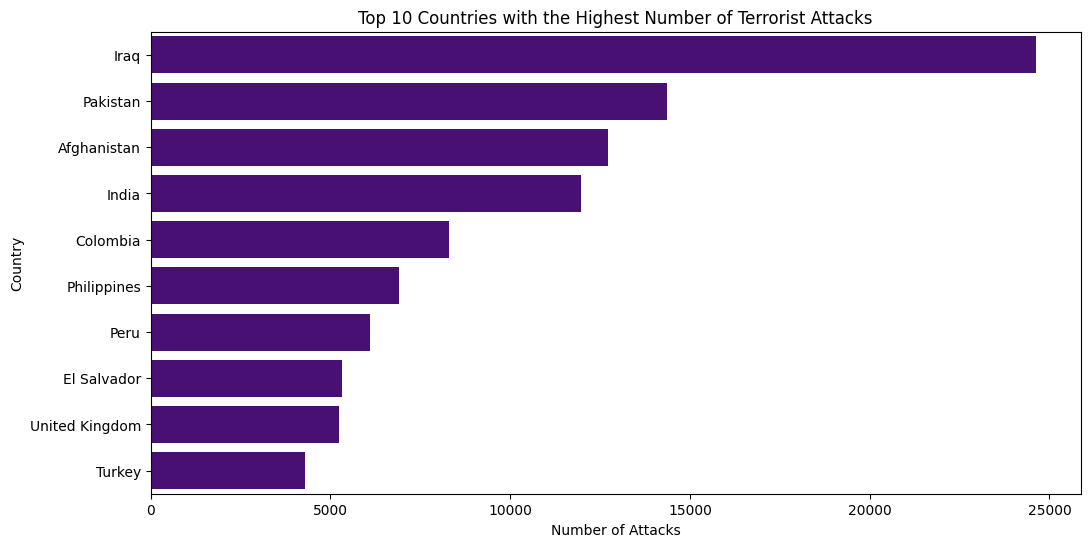

In [ ]:
# Plotting the bar chart
# Plot the figure size
plt.figure(figsize=(12,6))
# Plot the bar plot of top 10 countries w.r.t highest number of attacks
sns.barplot(x='no_of_attacks', y='country', data=top_countries,color='indigo')
# Set the title
plt.title('Top 10 Countries with the Highest Number of Terrorist Attacks')
# Set the x axis label
plt.xlabel('Number of Attacks')
# Set the y axis label
plt.ylabel('Country')
# Display the graph
plt.show()

#### Why did you pick the specific chart?
To compare top 10 countries with highest number of terrorist attacks.

### Insights:
* Iraq has the highest number of terrorist attacks.

# 12.Voilin plot

## Distribution of kills by Region

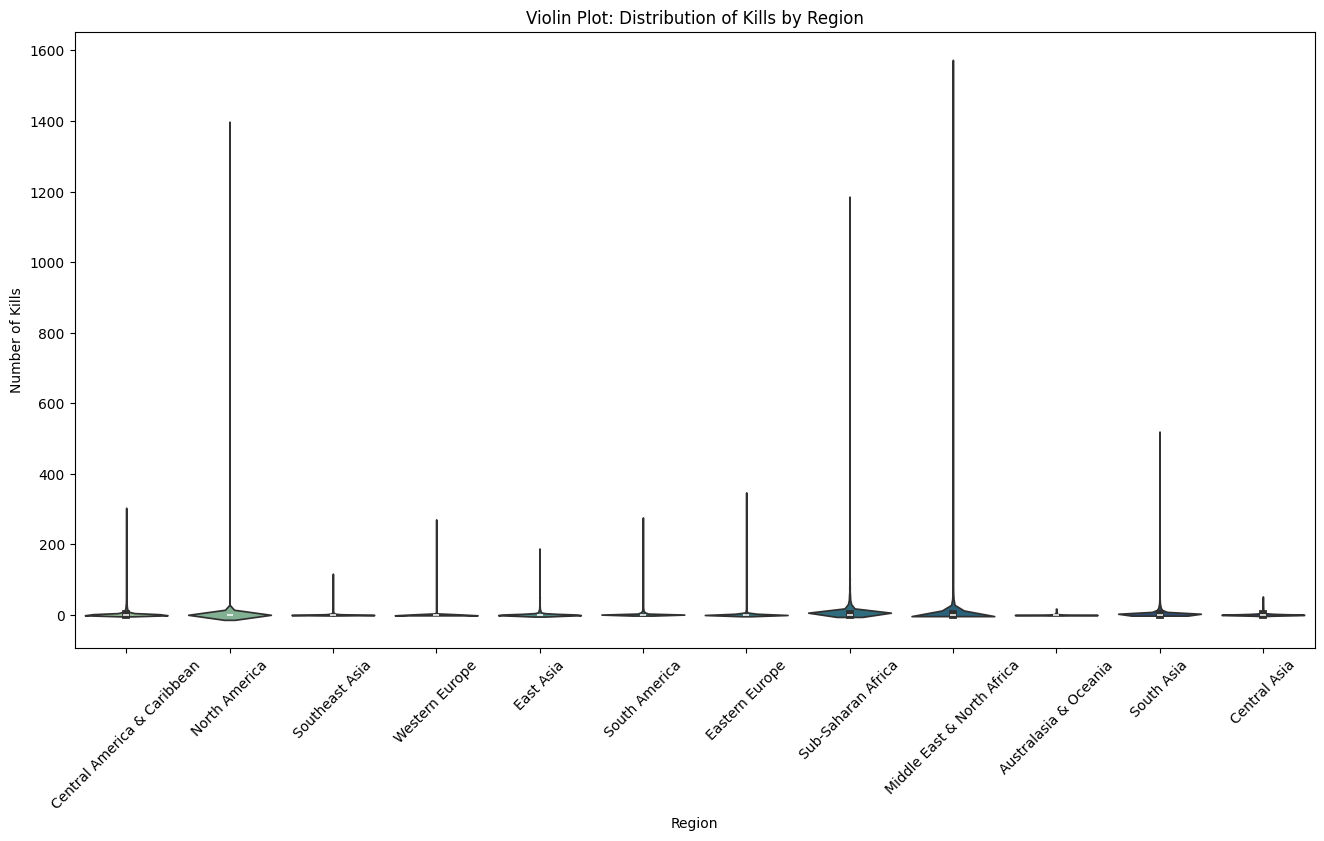

In [ ]:
# Violin Plot - Distribution of Kills by Region
# Plot the figure size
plt.figure(figsize=(16,8))
# Plot the Violin Plot - Distribution of Kills by Region
sns.violinplot(data=filtered_data, x='region', y='no_of_kills', palette='crest',density_norm='width',hue='region',legend=False)
# Set the title
plt.title('Violin Plot: Distribution of Kills by Region')
# Set the x axis label
plt.xlabel('Region')
# Set the y axis label
plt.ylabel('Number of Kills')
# Set the x axis angle for region values
plt.xticks(rotation=45)
# Display the graph
plt.show()


#### Why did you pick the specific chart?
To show the distribution of the number of kills across different regions.

### Insights:
* It reveals the distribution and density of kills in each region, indicating regions with higher or more variable casualties.
* Middle East & North Africa region is the most affected with the highest number of kills.

# 13.Pair plot

## Pairwise Relationships between Numeric Features(No.of kills and wounds) by Attack Type

<Figure size 1200x800 with 0 Axes>

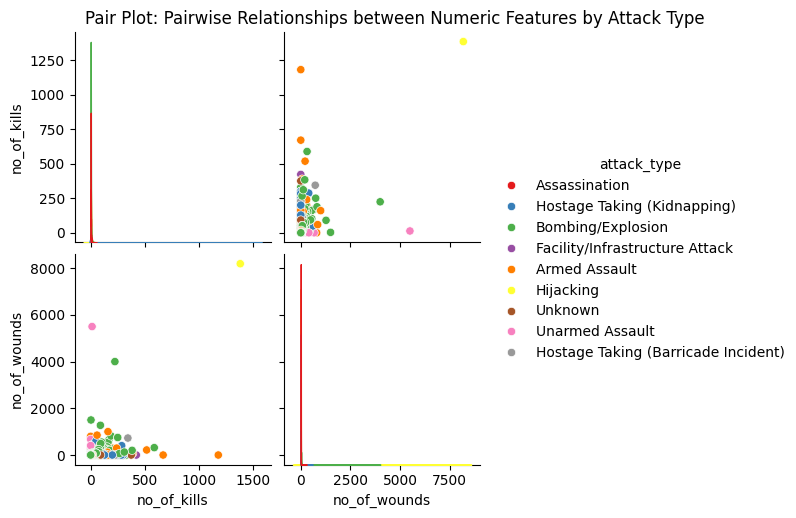

In [ ]:
# Pair Plot - Pairwise Relationships with Hue as Attack Type
# Plot the figure size
plt.figure(figsize=(12, 8))
# Plot the Pair Plot - Pairwise Relationships with Hue as Attack Type
sns.pairplot(filtered_data[['no_of_kills', 'no_of_wounds', 'attack_type']], hue='attack_type', palette='Set1')
# Set the title
plt.suptitle('Pair Plot: Pairwise Relationships between Numeric Features by Attack Type', y=1.02)
# Display the graph
plt.show()


#### Why did you pick the specific chart?
To observe pairwise relationships between numeric features with respect to the attack type.

### Insights:
It allows for a comprehensive view of how different numeric features interact with each other and how attack types influence these relationships.

# 14.Line chart

## Number of attacks in India over the years

In [ ]:
# Filter the data for attacks in India
filtered_data_India = filtered_data[filtered_data['country']=='India']

In [ ]:
# Aggregate the number of attacks per year
attacks_per_year = filtered_data_India['year'].value_counts().rename_axis('year').reset_index(name='number_of_attacks')

attacks_per_year.head(10)

,year,number_of_attacks
0,2016,1025
1,2017,966
2,2015,884
3,2014,860
4,2013,694
5,2009,672
6,2010,663
7,2011,645
8,2012,611
9,2008,534


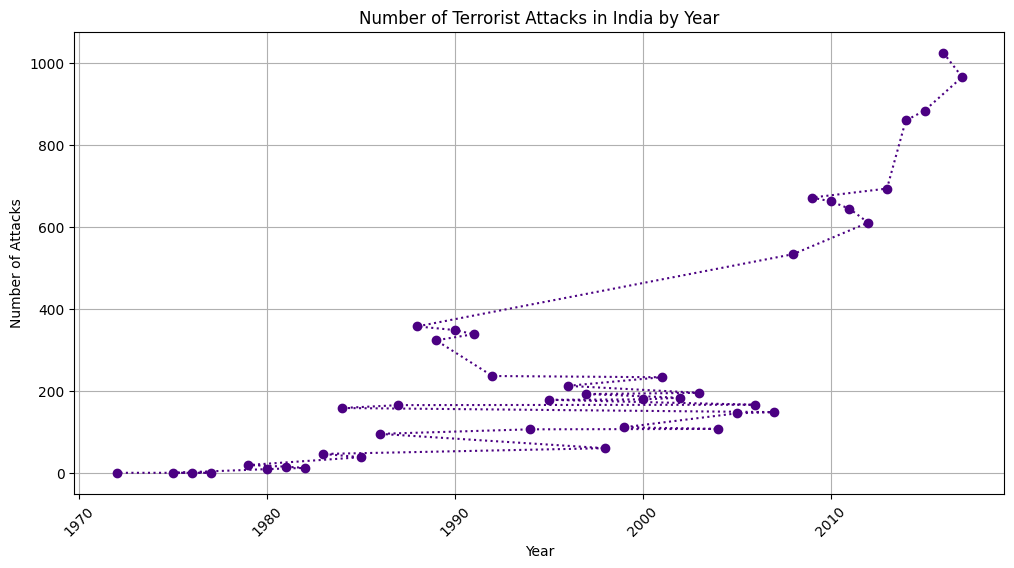

In [ ]:
year=attacks_per_year['year']
number_of_attacks=attacks_per_year['number_of_attacks']
# Plot the figure size
plt.figure(figsize=(12,6))
# Plot the line chart to find no of terrorist attacks in India by year
plt.plot(year,number_of_attacks,color='indigo',marker='o',linestyle=':')
# Set the title
plt.title('Number of Terrorist Attacks in India by Year')
# Set the x axis label
plt.xlabel('Year')
# Set the y axis label
plt.ylabel('Number of Attacks')
# Display the grid
plt.grid(True)
# Set the x axis angle
plt.xticks(rotation=45)
# Display the graph
plt.show()

#### Why did you pick the specific chart?
A line chart is ideal for visualizing trends over time. It allows us to clearly see how the number of terrorist attacks in India has changed year by year.

### Insights:
* With the trends showing, from the year 2008 the terrorist attacks in India is higher than before.

# 15.Line chart

## Number of People Killed and Wounded in Terrorist Attacks in India by Year

In [ ]:
filtered_data.head(2)

,eventid,year,month,day,country,region,provstate,city,attack_type,target_type,target,nationality,perpetrator_type,weap_type,no_of_kills,no_of_wounds
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Julio Guzman,Dominican Republic,MANO-D,Unknown,1.0,0.0
1,197000000002,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",Belgium,23rd of September Communist League,Unknown,0.0,0.0


In [ ]:
# Filter the data for attacks in India
filtered_data_India = filtered_data[filtered_data['country']=='India']

In [ ]:
# Aggregate the number of people killed per year

kills_per_year = filtered_data_India.groupby('year')['no_of_kills'].sum().reset_index()
kills_per_year.no_of_kills.nlargest(10)

17    1152.0
16    1113.0
13     966.0
15     907.0
14     874.0
21     853.0
32     824.0
34     812.0
33     774.0
30     722.0
Name: no_of_kills, dtype: float64

In [ ]:
# Aggregate the number of people wounded per year
wounds_per_year = filtered_data_India.groupby('year')['no_of_wounds'].sum().reset_index()
wounds_per_year.no_of_wounds.nlargest(10)

30    2138.0
32    1759.0
21    1416.0
16    1326.0
29    1216.0
31    1187.0
26    1186.0
27    1183.0
25    1144.0
15    1042.0
Name: no_of_wounds, dtype: float64

In [ ]:
# Rename the columns
kills_per_year.columns = ['Year', 'Number of Kills']
wounds_per_year.columns = ['Year', 'Number of Wounds']

In [ ]:
#filtered_data_India.groupby('year')['kills_per_year.columns']['wounds_per_year.columns']

In [ ]:
#filtered_data_India.groupby('year').agg({'kills_per_year':'sum','wounds_per_year':'sum'})

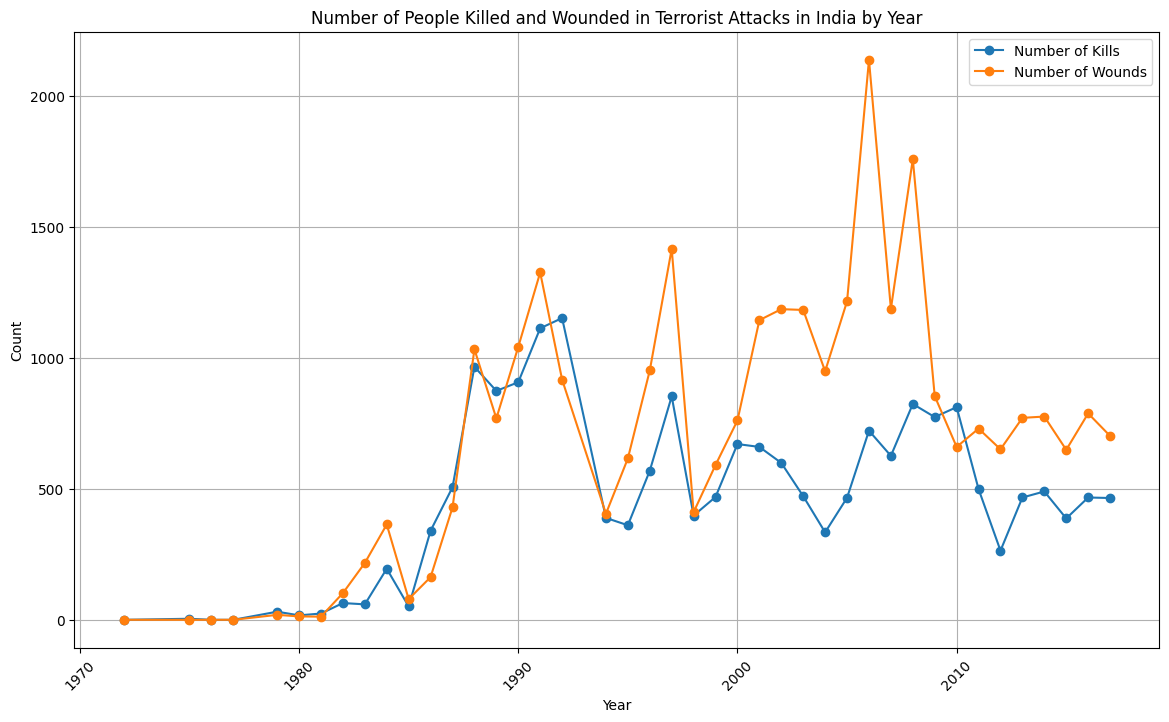

In [ ]:

# Plot the figure size
plt.figure(figsize=(14, 8))
# Plot the line chart for number of kills
plt.plot(kills_per_year['Year'], kills_per_year['Number of Kills'], marker='o', linestyle='-', label='Number of Kills')
# Plot the line chart for number of wounds
plt.plot(wounds_per_year['Year'], wounds_per_year['Number of Wounds'], marker='o', linestyle='-', label='Number of Wounds')
# Set the title
plt.title('Number of People Killed and Wounded in Terrorist Attacks in India by Year')
# Set the x axis label
plt.xlabel('Year')
# Set the x axis label
plt.ylabel('Count')
# Plot the grid lines
plt.grid(True)
# set the x axis angle
plt.xticks(rotation=45)
# Set the legend
plt.legend()
# Display the graph
plt.show()

#### Why did you pick the specific chart?
For visualizing trends over time for multiple variables like how the number of people killed and wounded in terrorist attacks in India has changed year by year.

### Insights:
* The line chart can show the overall trend in the number of people killed and wounded over the years.

In [ ]:
filtered_data.head(2)

,eventid,year,month,day,country,region,provstate,city,attack_type,target_type,target,nationality,perpetrator_type,weap_type,no_of_kills,no_of_wounds
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Julio Guzman,Dominican Republic,MANO-D,Unknown,1.0,0.0
1,197000000002,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",Belgium,23rd of September Communist League,Unknown,0.0,0.0


## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Based on the analysis of the Global Terrorism Database (GTD), here are several recommendations for the client to help achieve their business objectives of understanding and mitigating the impact of terrorism:

1.Focused Security Measures:

Most Affected Countries: Allocate resources and security measures to countries that are most affected by terrorism. Countries like Iraq, Afghanistan, and Pakistan consistently experience high numbers of attacks.

High-Risk Regions: Implement region-specific security protocols in areas with a high frequency of attacks. Prioritize regions such as the Middle East and South Asia for security enhancements.

2.Enhanced Intelligence Gathering:

Active Terrorist Groups: Focus intelligence efforts on tracking and infiltrating the most active terrorist groups. Groups like ISIS and the Taliban have been responsible for a significant number of attacks in recent years.

Emerging Threats: Monitor emerging terrorist groups and understand their operational tactics to preemptively address new threats.

3.Preventive Measures and Community Engagement:

Target Types: Protect commonly targeted infrastructures such as public places, government buildings, and transportation systems. Implement advanced security checks and emergency response protocols.
Public Awareness: Increase public awareness and preparedness through educational campaigns and training on how to respond during terrorist incidents.

4.Policy Development and International Cooperation:

Data-Driven Policies: Use the insights from the data to develop policies aimed at counter-terrorism. For example, years with peaks in attacks should be studied to understand the triggers and preventive measures can be strengthened based on these insights.

Global Collaboration: Foster international cooperation to share intelligence, resources, and strategies to combat terrorism more effectively on a global scale.

5.Resource Allocation:

Healthcare and Emergency Services: Allocate sufficient resources to healthcare and emergency services in regions frequently affected by terrorism to ensure rapid and efficient response to incidents.

Support for Victims: Develop support systems for victims and communities affected by terrorism, including mental health services, rehabilitation, and financial assistance.

# **Conclusion**

The Global Terrorism Database provides a comprehensive overview of terrorist activities worldwide, allowing for an in-depth analysis of trends and patterns in terrorism. Through our analysis, several key insights emerged:

* Attack Types: Bombings and explosions are the most common types of attacks, highlighting the need for enhanced bomb detection and disposal capabilities.

* Private Citizens & Property are the one's most affected by the terrorist incidents with the number of people is 43,511.

* Followed by this, Military and Police one's are also most affected with such incidents with the number of 27,894 and 24,506 people.

* Geographical Concentration: Terrorist attacks are concentrated in specific countries and regions, with Iraq, Afghanistan, and Pakistan being the most affected. This geographical concentration necessitates targeted security measures.

* The region Middle East & North Africa has the highest distribution percentage of the terrorist attacks with 27.8%.

* Next followed by South Asia with 24.8%.

* India also experienced the highest number of terrorist activities from the year 2008-2017.

* Sub-Saharan Africa has the highest average number 4.92% of kills per region.

* Western Europe has the lowest average number of kills per region.

* Perpetrator Groups: Certain terrorist groups, such as ISIS and the Taliban, are highly active and responsible for a significant number of attacks. Focusing intelligence efforts on these groups can yield significant benefits in counter-terrorism efforts.

* Most of the attacks are done by the unknown terrorists, doesn't know which terrorist group they belong to.

* Taliban and Islamic state of Iraq and the Levant(ISIL) are also among the active terrorist groups.


* Temporal Trends: Analyzing the number of attacks and casualties over time reveals peaks and trends that can inform policy and preventive measures.

By leveraging these insights, the client can develop a strategic approach to counter-terrorism that includes focused security measures, enhanced intelligence gathering, community engagement, policy development, and efficient resource allocation. This multifaceted approach is crucial for mitigating the impact of terrorism and ensuring the safety and security of affected regions.

Furthermore, continuous monitoring and analysis of terrorism data will enable the client to adapt to evolving threats and maintain an effective counter-terrorism strategy.